# Test autoFRK

**Title**: Test autoFRK Functionality

**Author**: Hsu, Yao-Chih

**Reviewer**: Xie, Yi-Xuan

**Version**: 1141020

**Description**: This script tests the autoFRK python version in different scenarios.

**Reference**: Resolution Adaptive Fixed Rank Kringing by ShengLi Tzeng & Hsin-Cheng Huang

## Install our python autoFRK

In [1]:
import sys
import numpy as np
import torch
print("=" * 50)
print("Python Environment Info")
print("=" * 50)
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version.split()[0]}")
print()

print("=" * 50)
print("Package Locations")
print("=" * 50)
print(f"Torch location: {torch.__file__}")
print(f"NumPy location: {np.__file__}")
print()

print("=" * 50)
print("PyTorch Info")
print("=" * 50)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA build: {torch.version.cuda}")
print()

print("=" * 50)
print("Test PyTorch Computation")
print("=" * 50)
x = torch.rand(3, 3)
print(f"Random tensor:\n{x}")
print(f"Sum: {x.sum().item():.4f}")

Python Environment Info
Python executable: d:\Program Files\Python312\python.exe
Python version: 3.12.8

Package Locations
Torch location: C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torch\__init__.py
NumPy location: C:\Users\user\AppData\Roaming\Python\Python312\site-packages\numpy\__init__.py

PyTorch Info
PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA build: None

Test PyTorch Computation
Random tensor:
tensor([[0.7369, 0.5357, 0.0330],
        [0.2562, 0.4273, 0.7985],
        [0.5636, 0.0313, 0.6128]])
Sum: 3.9953


In [2]:
import shutil
if shutil.which("dot") is None:
    error_msg = "Graphviz 'dot' executable not found. Please install Graphviz from https://graphviz.org/download/ and ensure it is added to your system PATH. Then restart your computer to apply the changes."
    raise EnvironmentError(error_msg)

In [3]:
# install autoFRK in development mode
import os
import sys
module_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))

!"{sys.executable}" -m pip uninstall -y autoFRK
!"{sys.executable}" -m pip install --upgrade pip build setuptools wheel matplotlib pandas torchviz graphviz
!"{sys.executable}" -m build {module_root}
!"{sys.executable}" -m pip install -e "{module_root}"

Found existing installation: autoFRK 1.2.3
Uninstalling autoFRK-1.2.3:
  Successfully uninstalled autoFRK-1.2.3
* Creating isolated environment: venv+pip...
* Installing packages in isolated environment:
  - setuptools>=61.0
  - wheel
* Getting build dependencies for sdist...
running egg_info
writing src\autoFRK.egg-info\PKG-INFO
writing dependency_links to src\autoFRK.egg-info\dependency_links.txt
writing requirements to src\autoFRK.egg-info\requires.txt
writing top-level names to src\autoFRK.egg-info\top_level.txt
reading manifest file 'src\autoFRK.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'src\autoFRK.egg-info\SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing src\autoFRK.egg-info\PKG-INFO
writing dependency_links to src\autoFRK.egg-info\dependency_links.txt
writing requirements to src\autoFRK.egg-info\requires.txt
writing top-level names to src\autoFRK.egg-info\top_level.txt
reading manifes

C:\Users\user\AppData\Local\Temp\build-env-hzfh20h1\Lib\site-packages\setuptools\dist.py:483: SetuptoolsDeprecationWarning: Cannot find any files for the given pattern.
!!

        ********************************************************************************
        Pattern 'LICENCE*' did not match any files.

        By 2026-Mar-20, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.
        ********************************************************************************

!!
  for path in sorted(cls._find_pattern(pattern, enforce_match))
C:\Users\user\AppData\Local\Temp\build-env-hzfh20h1\Lib\site-packages\setuptools\dist.py:483: SetuptoolsDeprecationWarning: Cannot find any files for the given pattern.
!!

        ********************************************************************************
        Pattern 'LICENCE*' did not match any files.

        By 2026-Mar-20, you need to update your project and remove deprecated

Obtaining file:///C:/Users/user/Desktop/github/autoFRK-python
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for autoFRK (pyproject.toml): started
  Building editable for autoFRK (pyproject.toml): finished with status 'done'
  Created wheel for autoFRK: filename=autofrk-1.2.3-0.editable-py3-none-any.whl size=20039 sha256=82a97b704da073b8463a98d82ba4fcbd79cf2280dac084775c23da1aad422507
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-z4y3gzvc\wheels\52\0c\c1\406639587ca52486dcaee85d6579cc2a329952ec

## Import modules

In [57]:
# import modules
import os
import sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from autoFRK import AutoFRK
from autoFRK.utils.utils import to_tensor, p

## Version

In [58]:
!pip show autoFRK

In [59]:
from importlib.metadata import metadata

meta = metadata("autoFRK")
for key in meta:
    print(f"{key}: {meta[key]}")

Metadata-Version: 2.4
Name: autoFRK
Version: 1.2.3
Summary: autoFRK: Automatic Fixed Rank Kriging. The Python version with PyTorch
Author: ShengLi Tzeng, Hsin-Cheng Huang, Wen-Ting Wang, Yao-Chih Hsu
Maintainer: Yao-Chih Hsu
License-Expression: GPL-3.0-or-later
Project-URL: Homepage, https://github.com/Josh-test-lab/autoFRK-python
Project-URL: Homepage, https://github.com/Josh-test-lab/autoFRK-python
Keywords: kriging,spatial statistics,torch,autoFRK,geostatistics
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Classifier: Development Status :: 5 - Production/Stable
Requires-Python: >=3.10
Description-Content-Type: text/markdown
License-File: LICENSE
Requires-Dist: numpy>=1.23
Requires-Dist: numpy>=1.23

## Load data

In [83]:
# load data
datasets_path = f'../test datasets/matrixForTest'
data = pd.read_csv(os.path.join(datasets_path, 'matrixForTest_data.csv'))
locs = pd.read_csv(os.path.join(datasets_path, 'matrixForTest_locs.csv'))
data_missing = pd.read_csv(os.path.join(datasets_path, 'matrixForTest_data_missing.csv'))

In [84]:
# data
data_missing

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.652166,-5.366158,3.143780,NaN,-7.997662,1.136705,0.960326,3.201232,1.992290,2.001078,...,-0.448844,-0.577043,1.269652,0.347800,NaN,2.661689,-0.436828,-3.561380,-2.566957,3.640283
1,NaN,NaN,2.749028,0.729822,-4.332897,-2.829327,NaN,-2.724882,3.281578,-0.628886,...,-3.152476,-0.342614,7.929967,-2.177937,0.556117,-2.043759,4.111130,-5.352733,1.529268,-1.917891
2,-4.549512,-7.763640,-1.872094,2.033659,-5.619806,-2.764594,6.608074,-1.398568,0.612283,-2.144521,...,-11.434087,3.868390,NaN,7.577723,-6.269609,-1.125877,-13.487372,-0.227024,NaN,12.927128
3,-5.870963,-5.904798,-0.655968,7.860149,2.625713,-3.847751,7.439885,2.407433,3.273375,2.692631,...,-7.528925,6.847024,7.220447,4.332599,-3.998274,2.552754,NaN,3.684432,0.137623,7.370367
4,NaN,-8.789871,0.440326,6.932291,-0.442761,-4.145054,5.732851,0.655010,0.159350,-3.153300,...,NaN,4.540188,1.572350,7.350779,-3.499281,-0.169003,-10.041218,1.220481,-3.726887,8.765699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.790659,0.130805,5.131183,NaN,-4.404798,NaN,1.197340,-0.427687,1.653997,4.622978,...,-0.952464,4.506945,-0.397343,-4.158340,0.220648,-1.642949,10.328322,-4.605859,1.894557,NaN
96,1.685645,1.215962,NaN,-3.899476,-1.595553,1.209884,-0.674625,-3.748975,-2.862852,1.977467,...,3.481229,0.753463,-4.839027,-5.032350,3.904153,6.617573,6.643477,3.399834,NaN,NaN
97,-1.395409,-3.042111,1.776225,-0.018072,-8.091349,-0.487496,-5.728769,0.954178,NaN,4.115169,...,-0.294438,1.971506,0.779557,-3.610582,NaN,4.502825,2.828657,-1.532787,5.843775,3.382403
98,-4.765434,-4.096297,-6.376321,3.124180,10.963501,-6.188876,NaN,4.612062,-2.310631,-7.859488,...,-4.794723,1.663460,3.688412,12.393074,NaN,-0.586811,-14.112674,6.708079,-2.698385,7.515730


In [85]:
locs

,Var1,Var2
0,0.310345,0.551724
1,0.517241,0.827586
2,0.413793,0.103448
3,0.517241,0.344828
4,0.689655,0.034483
...,...,...
95,0.275862,0.655172
96,0.344828,0.862069
97,0.379310,0.758621
98,0.620690,0.241379


## Convert data to tensor

In [86]:
# convert to tensor
data = to_tensor(data.to_numpy())
locs = to_tensor((locs + 100).to_numpy())
data_missing = to_tensor(data_missing.to_numpy())

## Test on known locations

### Fit and predict

In [87]:
model = AutoFRK(
    logger_level=10
)
model.forward(
    data=data,
    loc=locs,
    tps_method=1
)

pred = model.predict()
pred

2025-11-15 15:17:05 - autoFRK.utils.logger - WARNING: Parameter "device" was not set. Value "cpu" detected and used.
2025-11-15 15:17:05 - autoFRK.utils.logger - INFO: Calculate TPS with spherical.
2025-11-15 15:17:06 - autoFRK.utils.logger - DEBUG: s + v == 0 detected at `estimator.py` line 395. Replacing with 1e-12.


{'pred.value': tensor([[ 2.0836e+30,  3.8756e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6505e+30],
         [ 2.0836e+30,  3.8756e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6505e+30],
         [ 2.0836e+30,  3.8756e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6505e+30],
         ...,
         [ 2.0836e+30,  3.8756e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6505e+30],
         [ 2.0836e+30,  3.8756e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6505e+30],
         [ 2.0835e+30,  3.8755e+30, -2.7932e+29,  ...,  7.7130e+30,
           4.2596e+30, -8.6504e+30]], dtype=torch.float64),
 'se': None}

### Compute MSE

In [88]:
import torch.nn.functional as F

F.mse_loss(pred['pred.value'].cpu(), data.cpu()).item()

3.385149474936544e+61


| tps_method setting | Overall MSE/MSPE (Python) | Overall MSE/MSPE (R) | Conclusion |
| :--- | :--- | :--- | :--- |
| **1. rectangular** | `11.853958747726011` | `11.8539587159961` | The results are highly consistent. |
| **2. sphrical** | `17.376517734701945` | There is no this setting in r autoFRK. | TBA |
| **3. sphrical_fast** | `13.362707942065565` | There is no this setting in r autoFRK. | TBA |


```r
11.8539587159961 # R mse result
```

In [89]:
# Initialize dictionary to store MSE for each time step
mse_per_time_step = {}

for i in range(data.shape[1]):
    y_pred = pred['pred.value'][:, i].cpu()
    y_true = data[:, i].cpu()

    tmp = F.mse_loss(y_pred, y_true)
    # Store the MSE for each time step
    mse_per_time_step[i] = tmp.item()
    print(tmp.item())

4.341518545060962e+60
1.5020081632619905e+61
7.801751787428911e+58
4.617751735326309e+61
2.6613084718258685e+61
5.781227992818091e+59
1.1981816064833747e+62
4.748055526760163e+59
4.0025571840281354e+61
2.485272410794865e+60
5.7973269434900196e+60
2.2765516002017217e+60
2.393737876548539e+59
2.0223585642543086e+60
5.851602683374428e+61
9.344080797355407e+60
3.446795875944532e+60
5.1135585266607984e+60
2.5293665356791855e+61
2.5636578792388627e+61
1.2609282869571638e+62
3.309224003641912e+58
1.1900843938326604e+62
1.9635820504976015e+61
2.0394874786340772e+61
1.0702903557687222e+62
7.758601384595744e+61
5.949045521010801e+61
1.8144554954001927e+61
7.483125718675314e+61


### Compare with R result

經過確認，R 與 Python 的結果是大致一致的。
全時間點與各時間點的 MSE ，與 R 的結果皆相差不大，精準度介於小數點後6位元至10位元。

In [90]:
# Load external MSE data for comparison
datasets_path = f'../test datasets/mseForCompare'
mse_each_time_known_locs = pd.read_csv(os.path.join(datasets_path, 'mse_each_time_known_locs.csv'))

# Compare MSE values
a = mse_each_time_known_locs.values
b = np.array(list(mse_per_time_step.values())).reshape(-1, 1)
temp = a - b

# Print differences
for i in range(temp.shape[0]):
    print(f"Time step {i} MSE difference: {temp[i][0]}")

Time step 0 MSE difference: -4.341518545060962e+60
Time step 1 MSE difference: -1.5020081632619905e+61
Time step 2 MSE difference: -7.801751787428911e+58
Time step 3 MSE difference: -4.617751735326309e+61
Time step 4 MSE difference: -2.6613084718258685e+61
Time step 5 MSE difference: -5.781227992818091e+59
Time step 6 MSE difference: -1.1981816064833747e+62
Time step 7 MSE difference: -4.748055526760163e+59
Time step 8 MSE difference: -4.0025571840281354e+61
Time step 9 MSE difference: -2.485272410794865e+60
Time step 10 MSE difference: -5.7973269434900196e+60
Time step 11 MSE difference: -2.2765516002017217e+60
Time step 12 MSE difference: -2.393737876548539e+59
Time step 13 MSE difference: -2.0223585642543086e+60
Time step 14 MSE difference: -5.851602683374428e+61
Time step 15 MSE difference: -9.344080797355407e+60
Time step 16 MSE difference: -3.446795875944532e+60
Time step 17 MSE difference: -5.1135585266607984e+60
Time step 18 MSE difference: -2.5293665356791855e+61
Time step 19 

### Plotting functions

tensor(4.3415e+60, dtype=torch.float64)


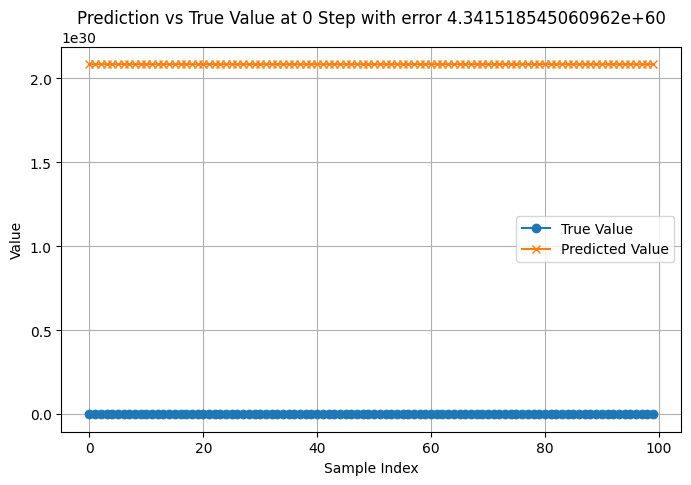

tensor(1.5020e+61, dtype=torch.float64)


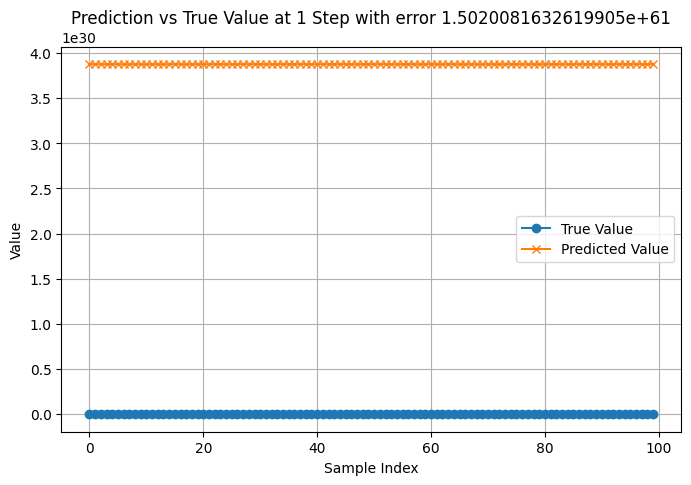

tensor(7.8018e+58, dtype=torch.float64)


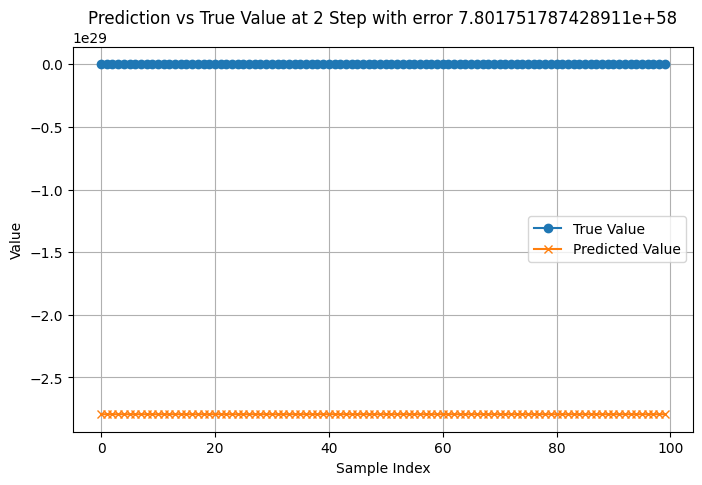

tensor(4.6178e+61, dtype=torch.float64)


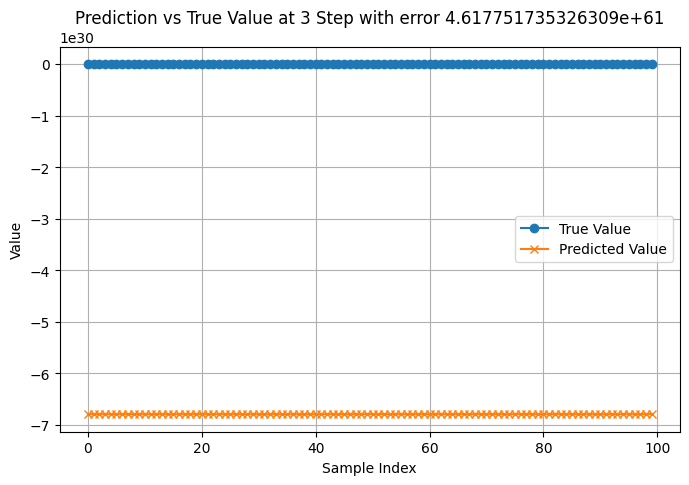

tensor(2.6613e+61, dtype=torch.float64)


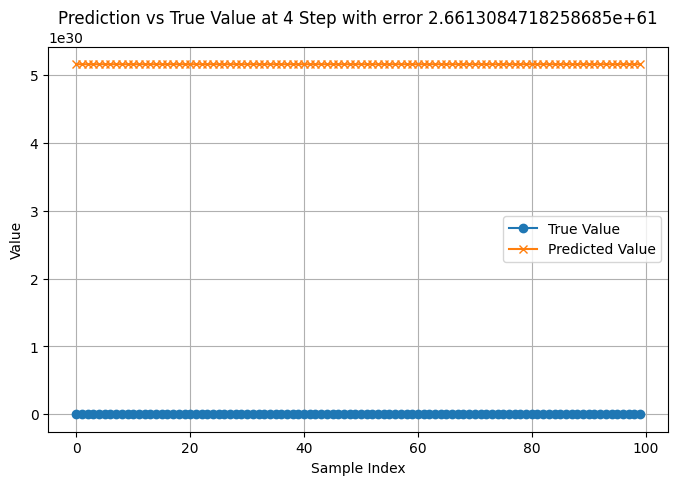

tensor(5.7812e+59, dtype=torch.float64)


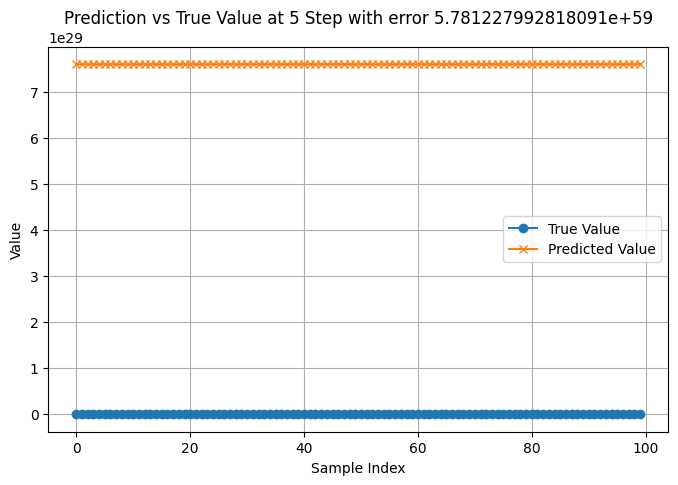

tensor(1.1982e+62, dtype=torch.float64)


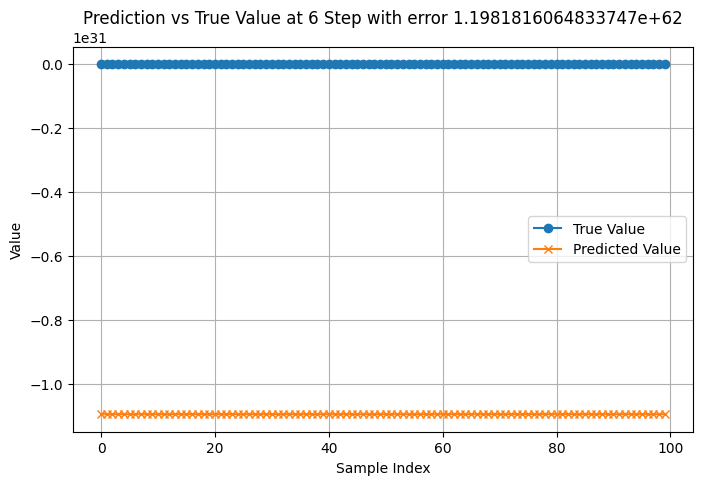

tensor(4.7481e+59, dtype=torch.float64)


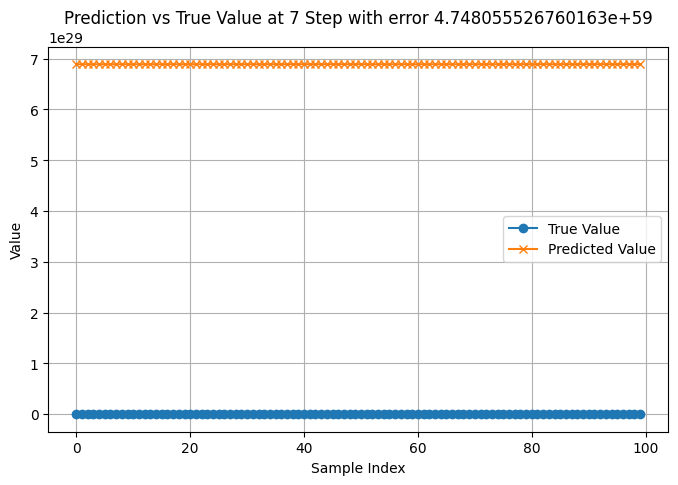

tensor(4.0026e+61, dtype=torch.float64)


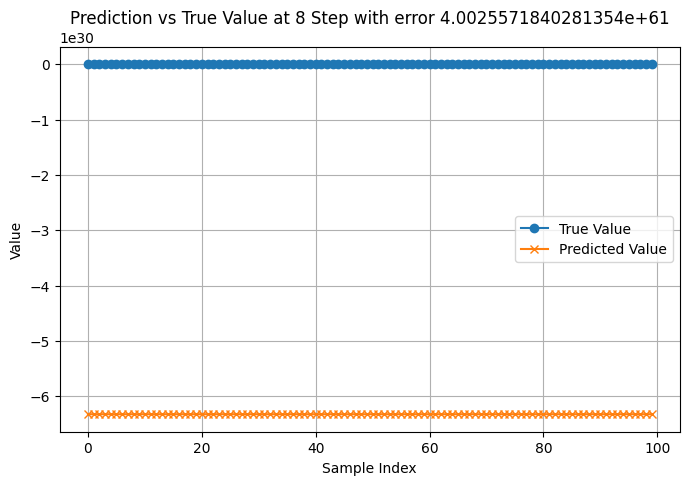

tensor(2.4853e+60, dtype=torch.float64)


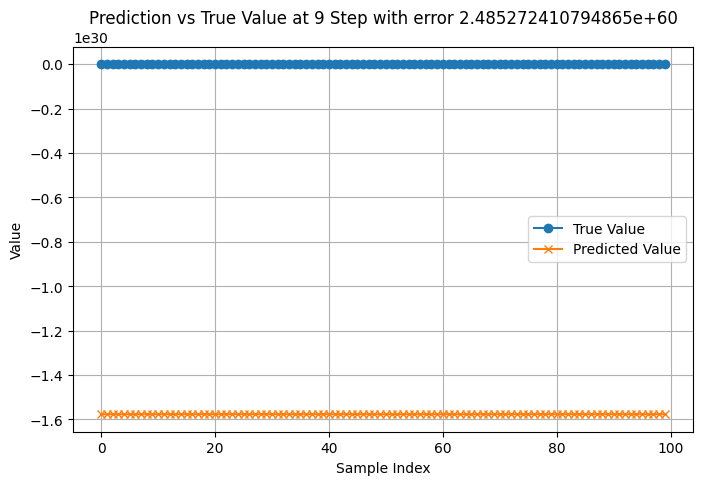

tensor(5.7973e+60, dtype=torch.float64)


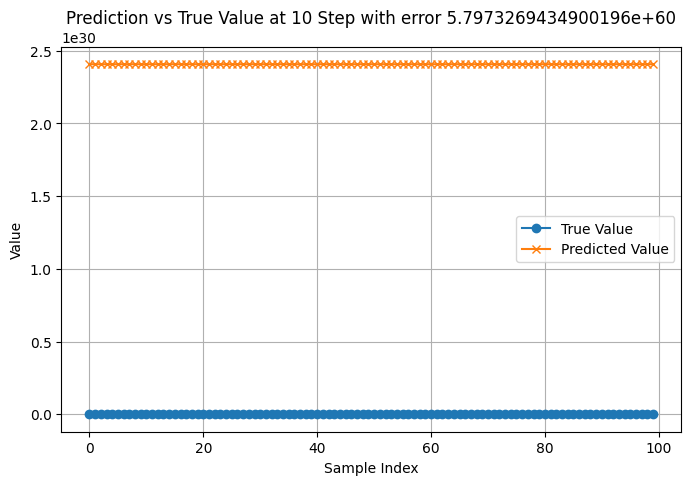

tensor(2.2766e+60, dtype=torch.float64)


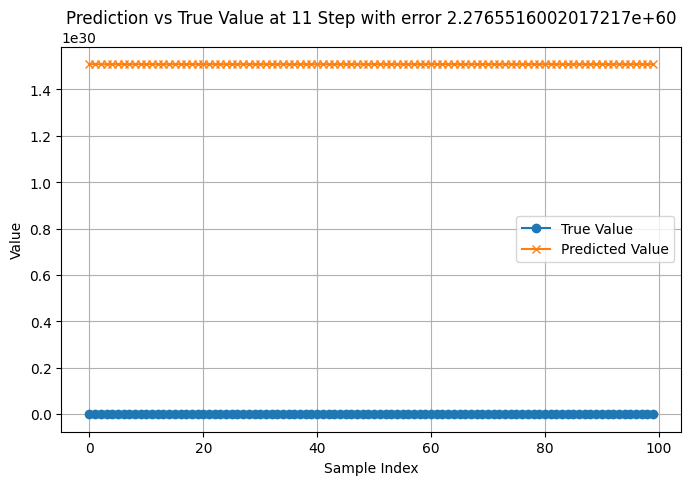

tensor(2.3937e+59, dtype=torch.float64)


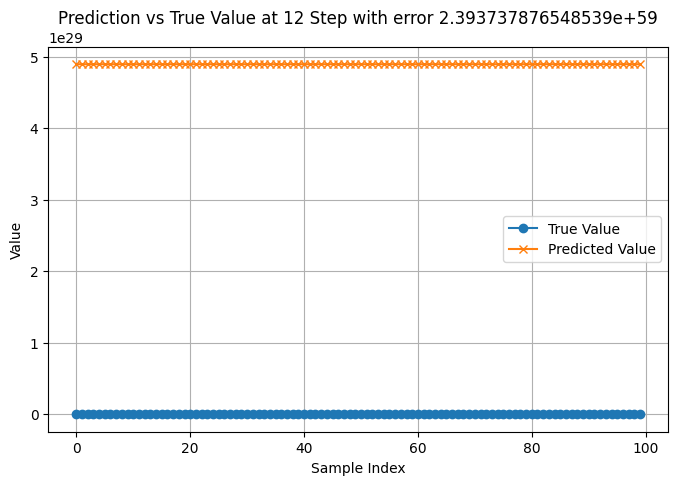

tensor(2.0224e+60, dtype=torch.float64)


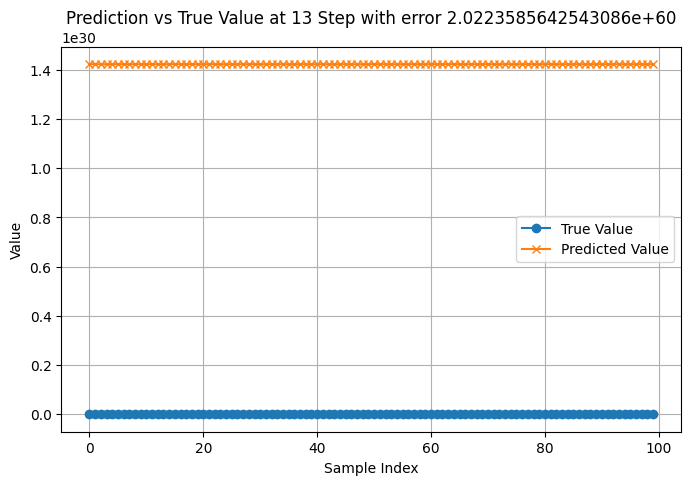

tensor(5.8516e+61, dtype=torch.float64)


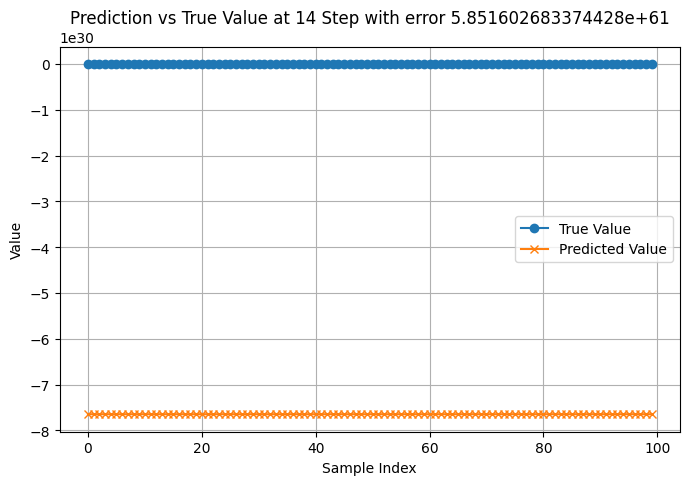

tensor(9.3441e+60, dtype=torch.float64)


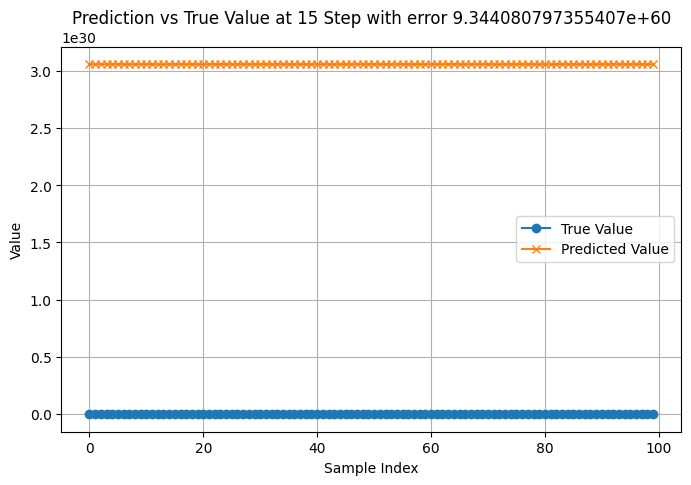

tensor(3.4468e+60, dtype=torch.float64)


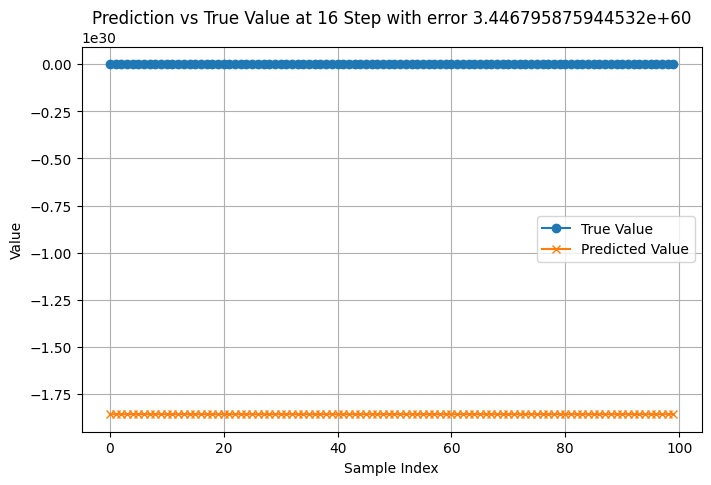

tensor(5.1136e+60, dtype=torch.float64)


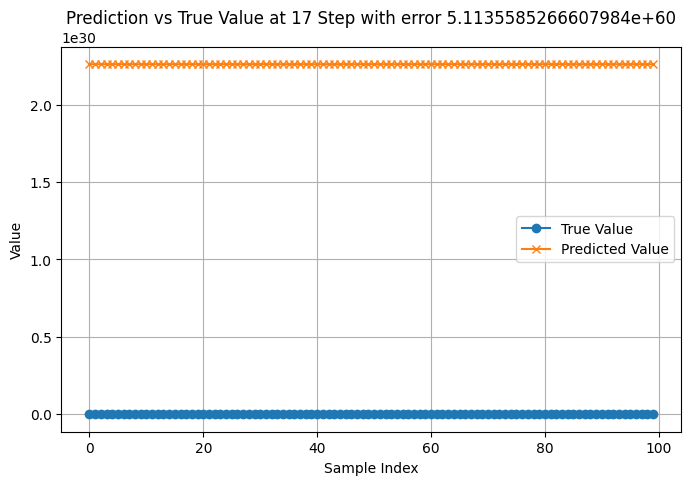

tensor(2.5294e+61, dtype=torch.float64)


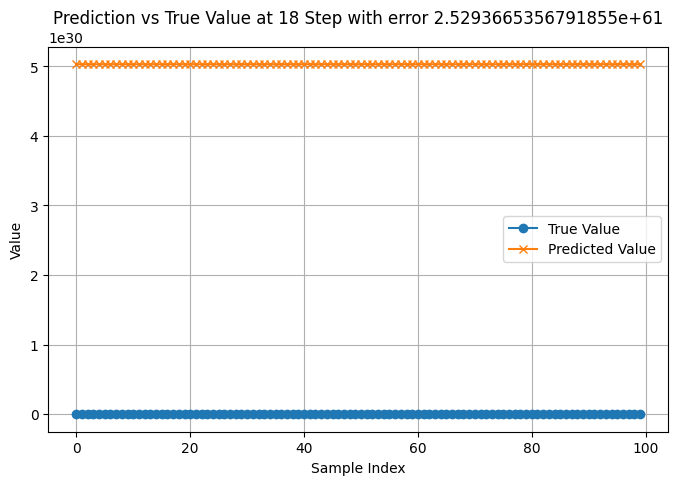

tensor(2.5637e+61, dtype=torch.float64)


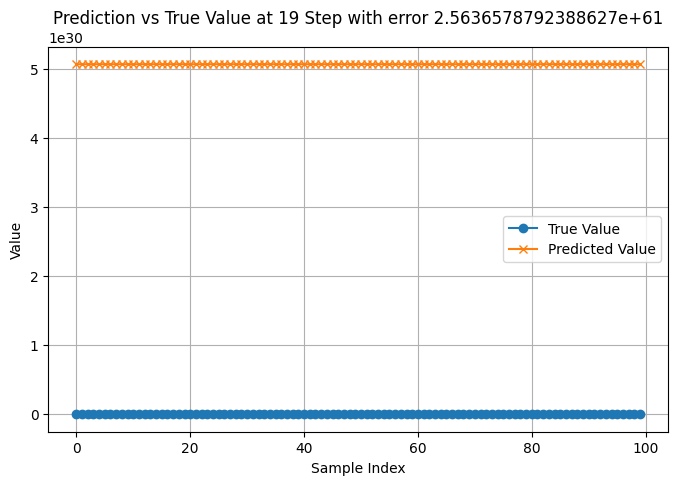

tensor(1.2609e+62, dtype=torch.float64)


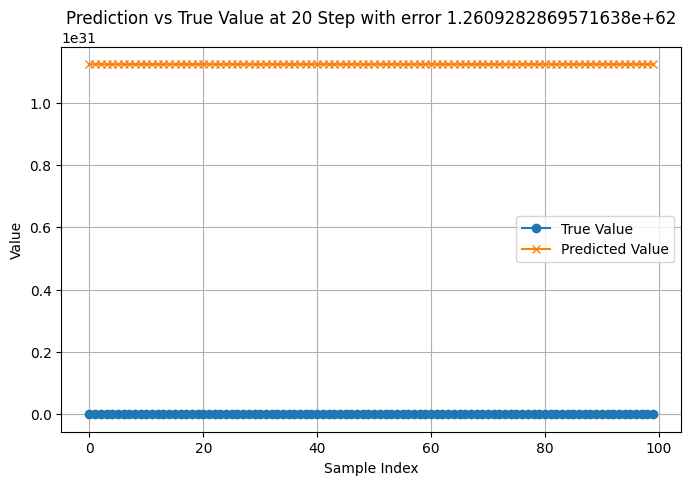

tensor(3.3092e+58, dtype=torch.float64)


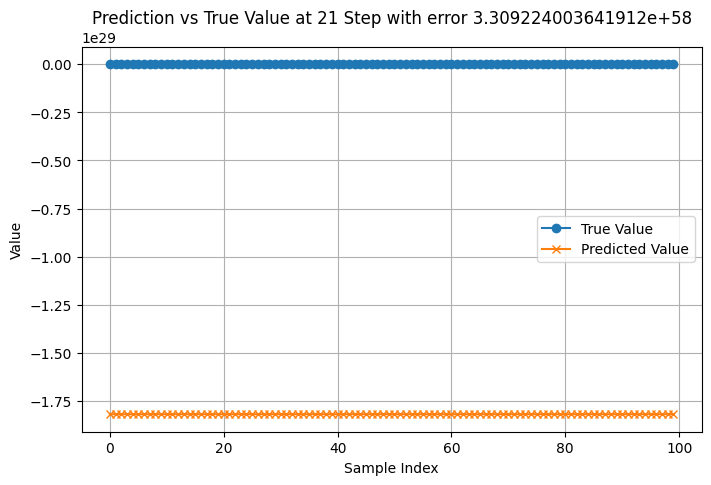

tensor(1.1901e+62, dtype=torch.float64)


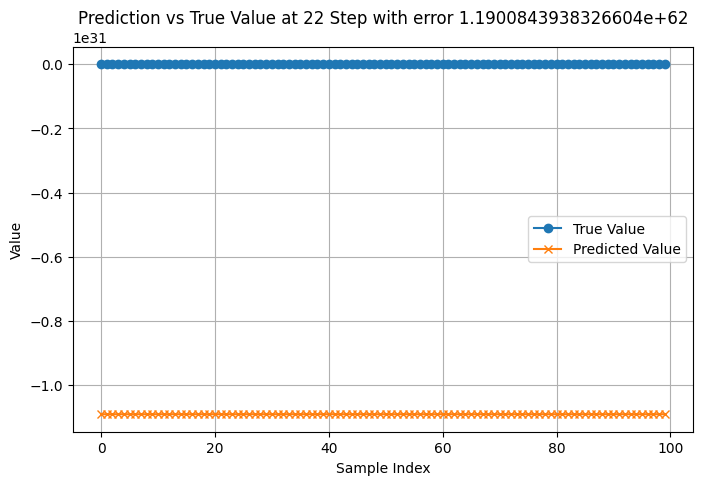

tensor(1.9636e+61, dtype=torch.float64)


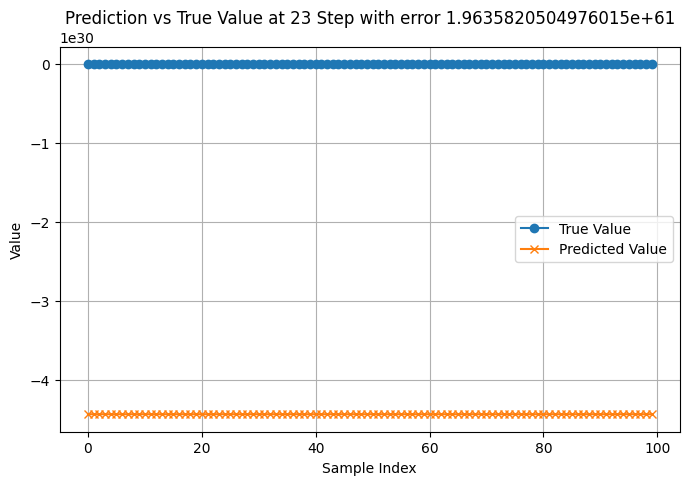

tensor(2.0395e+61, dtype=torch.float64)


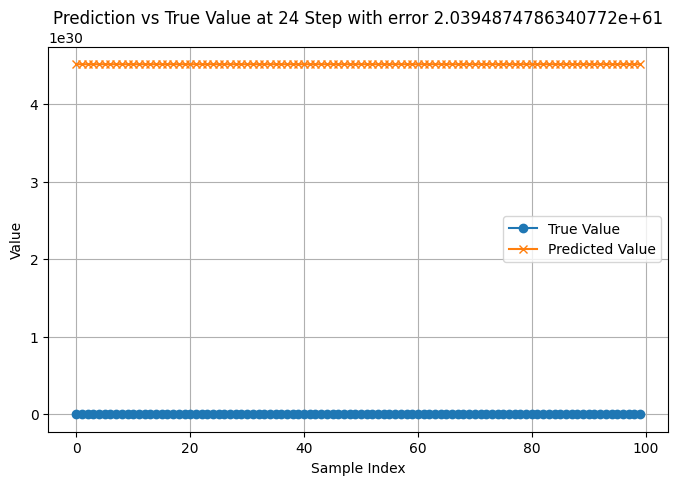

tensor(1.0703e+62, dtype=torch.float64)


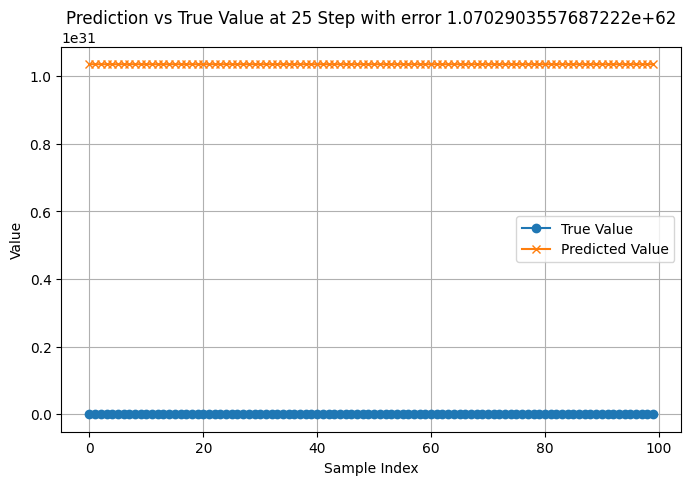

tensor(7.7586e+61, dtype=torch.float64)


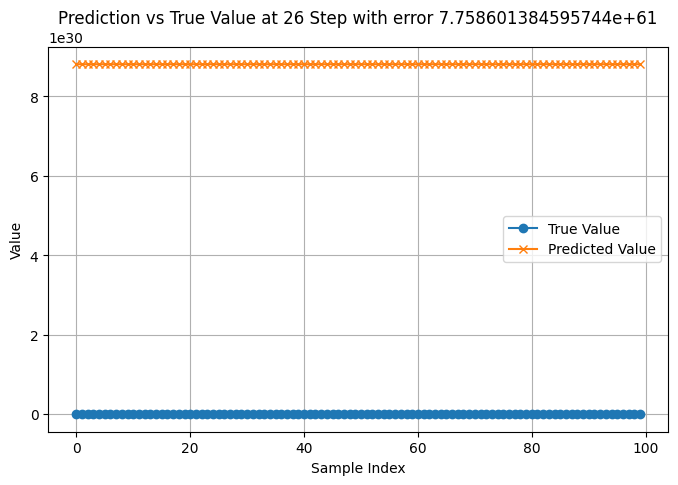

tensor(5.9490e+61, dtype=torch.float64)


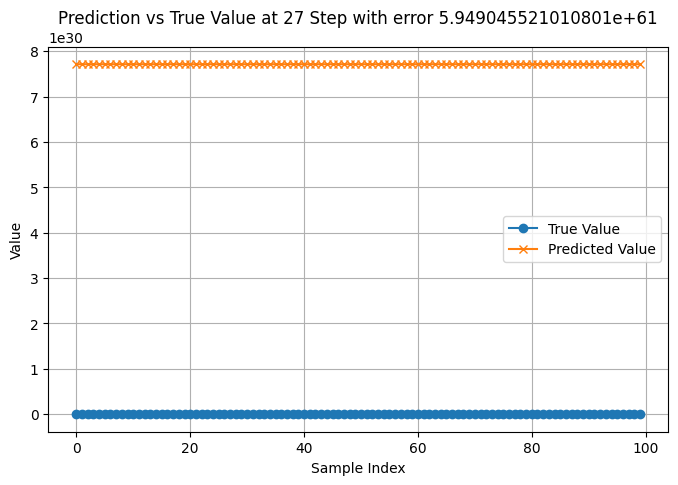

tensor(1.8145e+61, dtype=torch.float64)


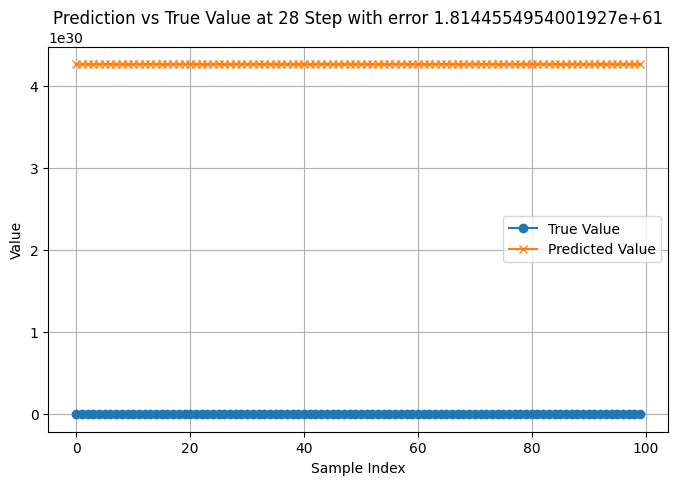

tensor(7.4831e+61, dtype=torch.float64)


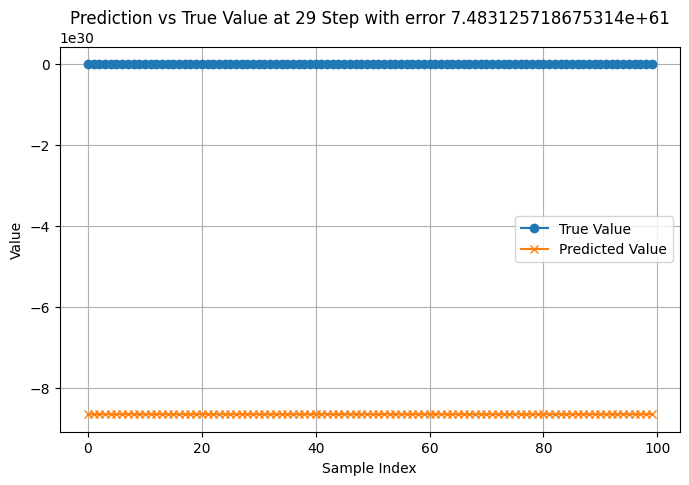

In [91]:
for i in range(data.shape[1]):
    y_pred = pred['pred.value'][:, i].detach().cpu()
    y_true = data[:, i].detach().cpu()

    tmp = F.mse_loss(y_pred, y_true)
    print(tmp)

    plt.figure(figsize=(8,5))
    plt.plot(y_true, label='True Value', marker='o')
    plt.plot(y_pred, label='Predicted Value', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Prediction vs True Value at {i} Step with error {round(tmp.item(), 2)}')
    plt.legend()
    plt.grid(True)
    plt.show()

3.3851494749206034e+61


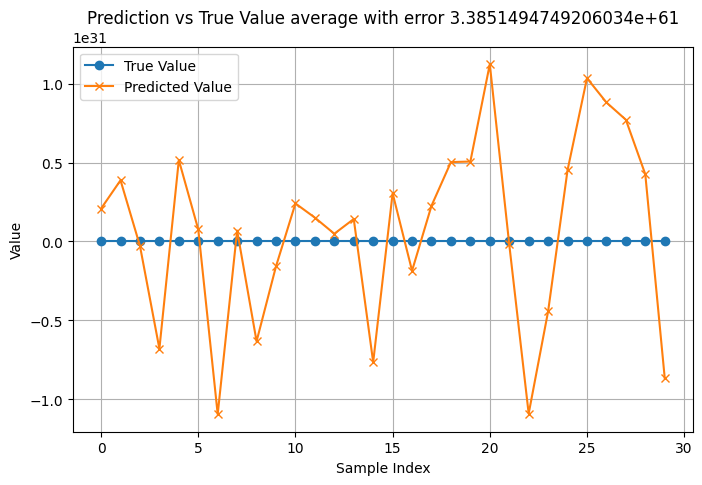

In [92]:
y_pred = pred['pred.value'].detach().cpu().mean(axis=0)
y_true = test_data.detach().cpu().mean(axis=0)

tmp = F.mse_loss(y_pred, y_true)
print(tmp.item())

plt.figure(figsize=(8,5))
plt.plot(y_true, label='True Value', marker='o')
plt.plot(y_pred, label='Predicted Value', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title(f'Prediction vs True Value average with error {round(tmp.item(), 2)}')
plt.legend()
plt.grid(True)
plt.show()

### Check gradient tracking

In [93]:
from torchviz import make_dot
SAVE_DIR = "gradient tracking/all known locations"
os.makedirs(SAVE_DIR, exist_ok=True)

for k, v in model.obj.items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        file_path = os.path.join(SAVE_DIR, k)
        dot = make_dot(v, show_attrs=False, show_saved=False)
        dot.attr(dpi='100')
        dot.render(file_path, format='pdf')

for k, v in model.obj['G'].items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        file_path = os.path.join(SAVE_DIR, k)
        dot = make_dot(v, show_attrs=False, show_saved=False)
        dot.attr(dpi='100')
        dot.render(file_path, format='pdf')

for k, v in pred.items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        file_path = os.path.join(SAVE_DIR, k)
        dot = make_dot(v, show_attrs=False, show_saved=False)
        dot.attr(dpi='100')
        dot.render(file_path, format='pdf')

M: requires_grad=False;  grad_fn=None; is_leaf=True
negloglik: requires_grad=False;  grad_fn=None; is_leaf=True
w: requires_grad=False;  grad_fn=None; is_leaf=True
V: requires_grad=False;  grad_fn=None; is_leaf=True
MRTS: requires_grad=False;  grad_fn=None; is_leaf=True
Xu: requires_grad=False;  grad_fn=None; is_leaf=True
pred.value: requires_grad=False;  grad_fn=None; is_leaf=True


## Test on unknown locations
### Train:Test = 7:3

In [94]:
## split data into train and test
train_data = data[:70, :]
test_data = data[70:, :]
train_locs = locs[:70, :]
test_locs = locs[70:, :]

### Fit and predict

In [95]:
## training on train data
model = AutoFRK()
model.forward(
    data=train_data,
    loc=train_locs,
    requires_grad=True
)

## predict on test data
pred = model.predict(
    newloc = test_locs
)

2025-11-15 15:17:26 - autoFRK.utils.logger - WARNING: Parameter "device" was not set. Value "cpu" detected and used.
2025-11-15 15:17:26 - autoFRK.utils.logger - INFO: Calculate TPS with rectangular.
2025-11-15 15:17:26 - autoFRK.utils.logger - INFO: Gradient tracking has been enabled for autoFRK.


### Compute MSE

In [96]:
# evaluate mse on test data
F.mse_loss(pred['pred.value'].cpu(), test_data.cpu()).item()

15.12048876409148

In [97]:
# Initialize dictionary to store MSPE for each time step
mspe_per_time_step = {}

for i in range(test_data.shape[1]):
    y_pred = pred['pred.value'][:, i].cpu()
    y_true = test_data[:, i].cpu()

    tmp = F.mse_loss(y_pred, y_true)
    # Store the MSE for each time step
    mspe_per_time_step[i] = tmp.item()
    print(tmp.item())

8.78612571399118
12.15715258994047
27.860024707986067
11.225912492026067
9.37709806517906
7.678352758157768
13.688552319600934
13.584735968129571
17.90525020406606
10.730386949097214
15.71469404810085
13.312778259682425
9.806043277105905
30.271494250590997
22.952631413216864
22.950731882412704
9.632236542042124
12.625046736456074
24.70793844701332
12.444309153106007
14.132192011644577
11.354103933033567
7.69776666864709
22.308032087423264
13.941704290097555
9.247811213410248
27.143048327327893
19.426390911355902
12.604382851169527
8.34773485073307


### Compare with R result

經過確認，R 與 Python 的結果是大致一致的。
全時間點與各時間點的 MSE ，與 R 的結果皆相差不大，精準度介於小數點後6位元至10位元。

In [98]:
# Load external MSPE data for comparison
datasets_path = f'../test datasets/mseForCompare'
mspe_each_time_unknown_locs = pd.read_csv(os.path.join(datasets_path, 'mspe_each_time_unknown_locs.csv'))

# Compare MSPE values
a = mspe_each_time_unknown_locs.values
b = np.array(list(mspe_per_time_step.values())).reshape(-1, 1)
temp = a - b

# Print differences
for i in range(temp.shape[0]):
    print(f"Time step {i} MSPE difference: {temp[i][0]}")

Time step 0 MSPE difference: 2.6532834100236204
Time step 1 MSPE difference: 12.95062596186743
Time step 2 MSPE difference: -0.4099513559531687
Time step 3 MSPE difference: 0.5989218619050334
Time step 4 MSPE difference: 5.25792212913014
Time step 5 MSPE difference: 1.7996668920741623
Time step 6 MSPE difference: 0.03924483475376661
Time step 7 MSPE difference: -1.412299842640671
Time step 8 MSPE difference: -0.05694074150975936
Time step 9 MSPE difference: 0.6838084370869861
Time step 10 MSPE difference: 0.4753795200199491
Time step 11 MSPE difference: -0.9274584396614252
Time step 12 MSPE difference: 0.6271608189063951
Time step 13 MSPE difference: 11.507013265030501
Time step 14 MSPE difference: 15.059506613377238
Time step 15 MSPE difference: 4.193214332096694
Time step 16 MSPE difference: -0.13117860470621423
Time step 17 MSPE difference: 6.313272823474424
Time step 18 MSPE difference: -7.3513231021252174
Time step 19 MSPE difference: 7.006392194215993
Time step 20 MSPE difference

### Plotting functions

8.78612571399118


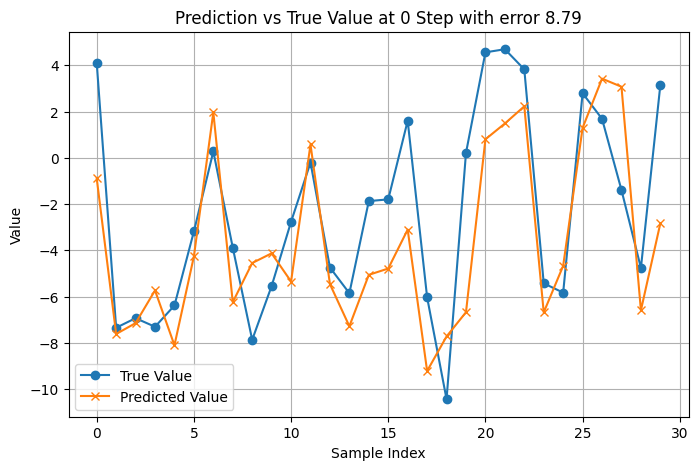

12.15715258994047


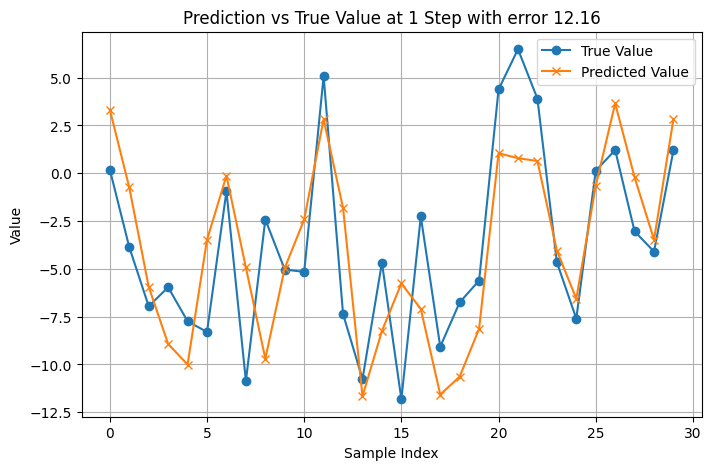

27.860024707986067


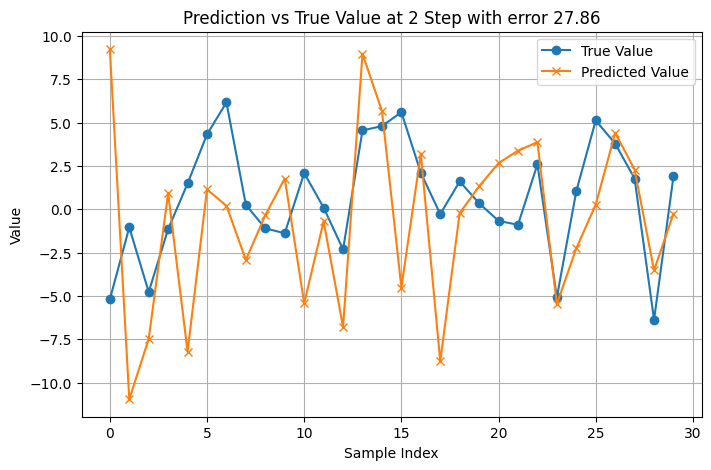

11.225912492026067


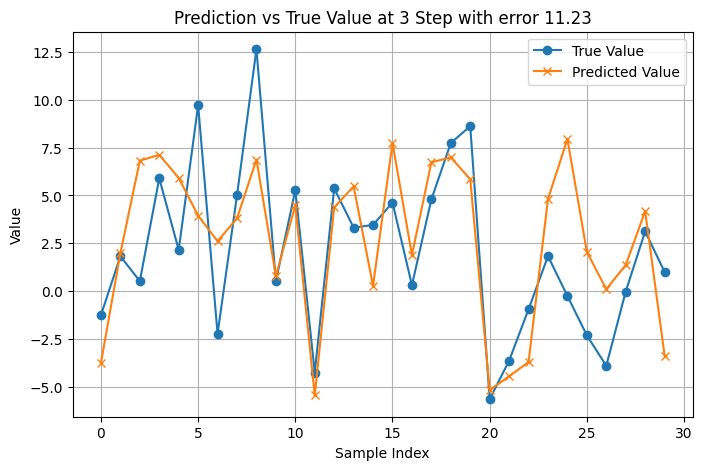

9.37709806517906


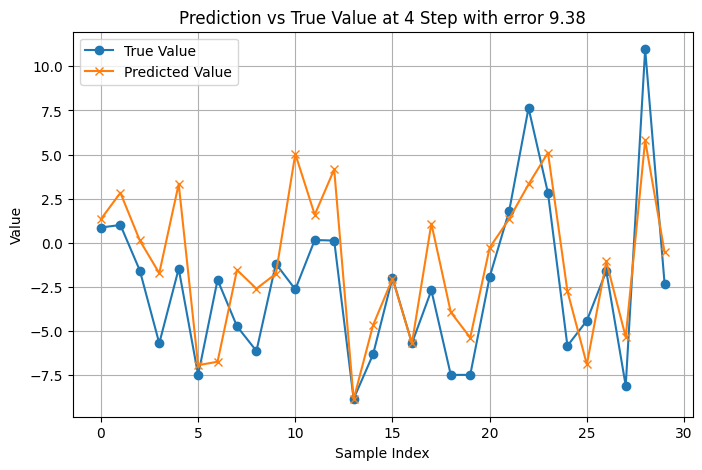

7.678352758157768


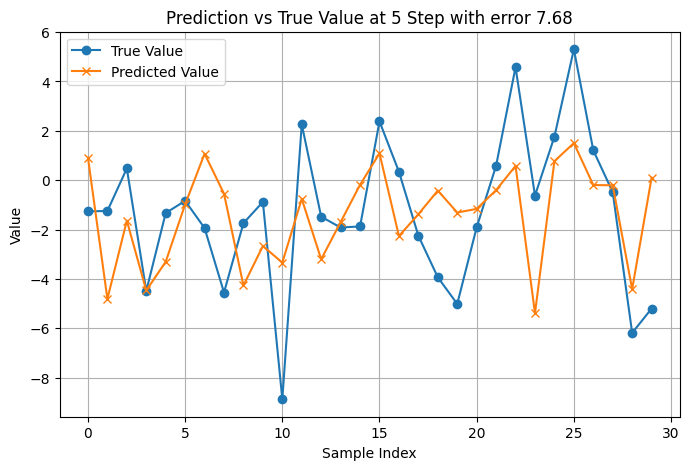

13.688552319600934


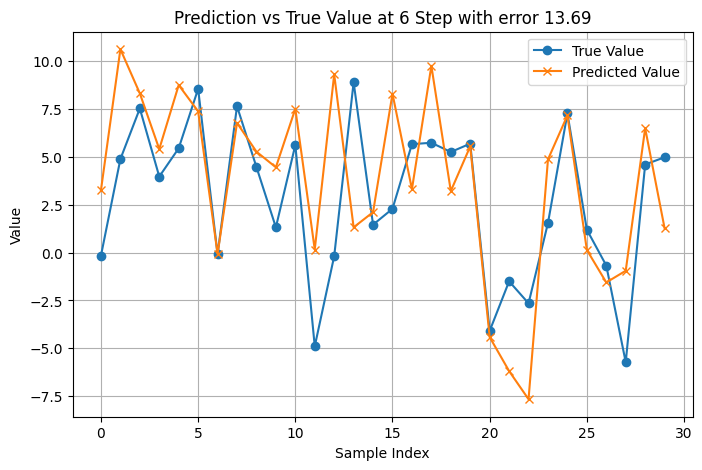

13.584735968129571


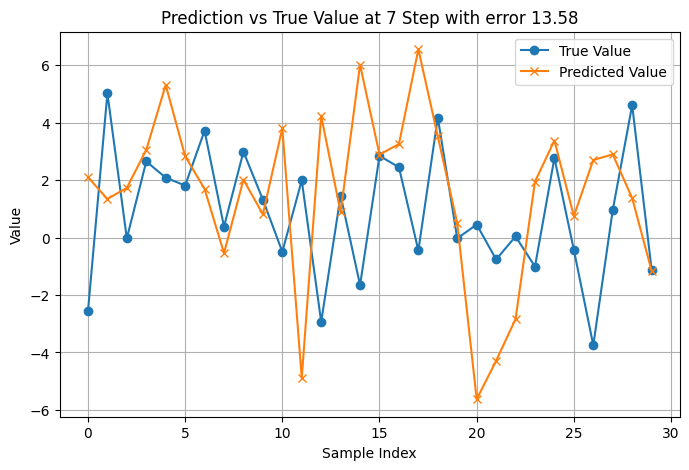

17.90525020406606


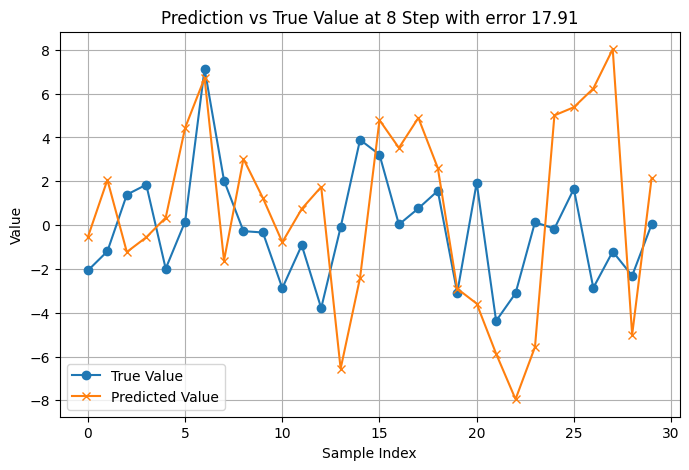

10.730386949097214


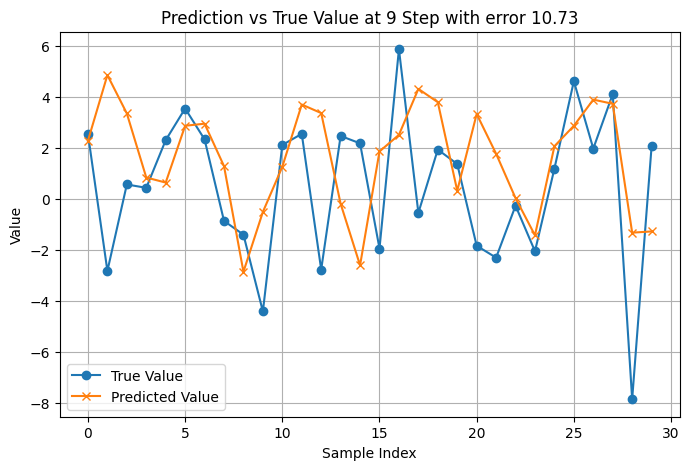

15.71469404810085


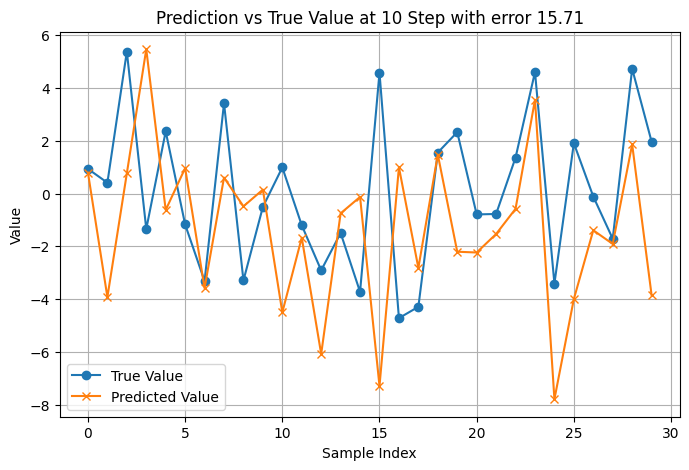

13.312778259682425


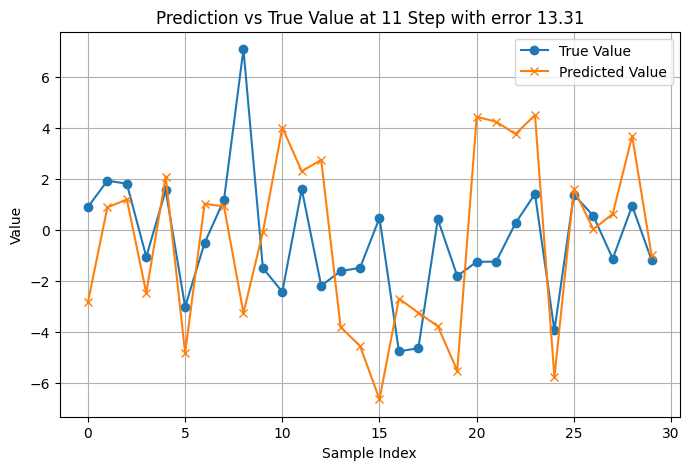

9.806043277105905


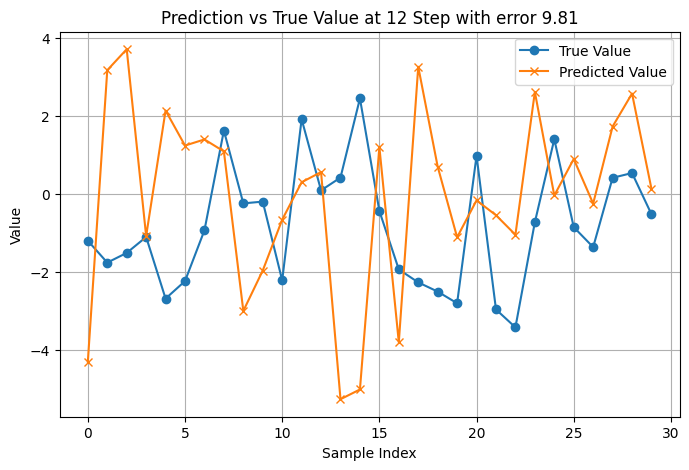

30.271494250590997


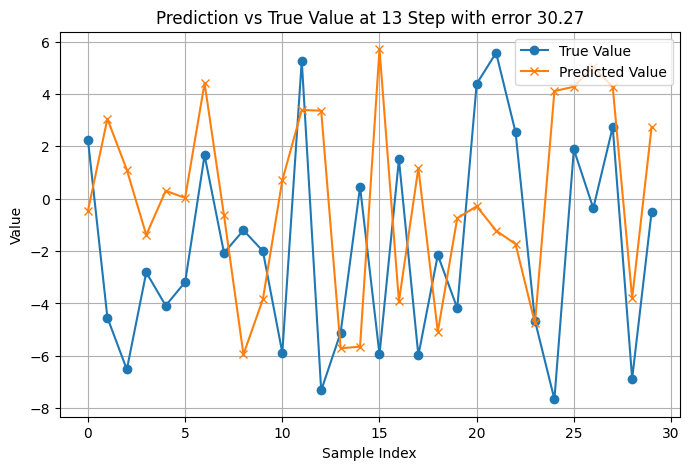

22.952631413216864


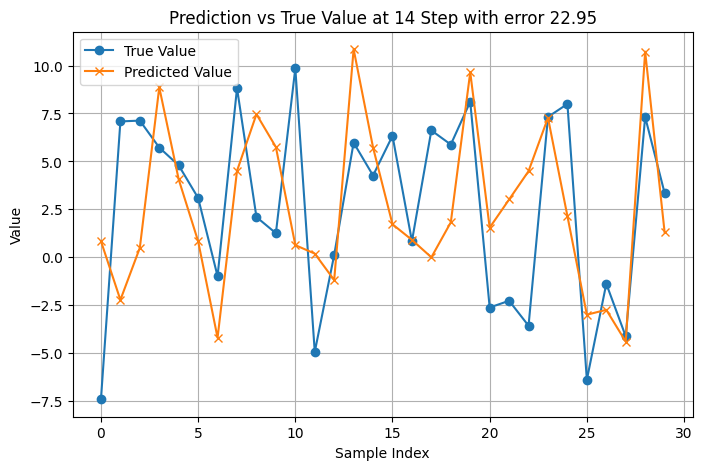

22.950731882412704


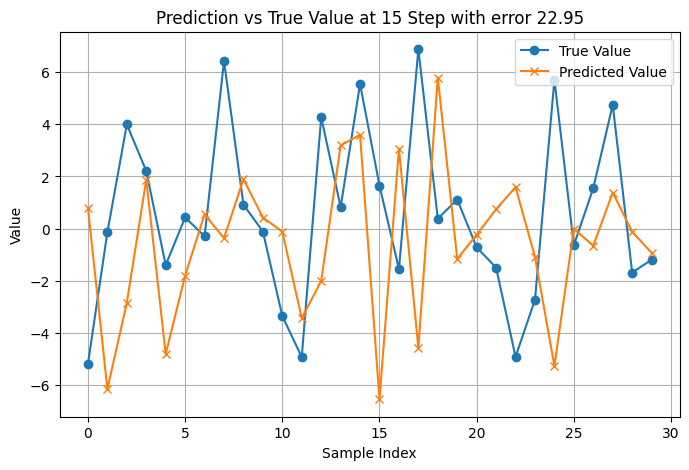

9.632236542042124


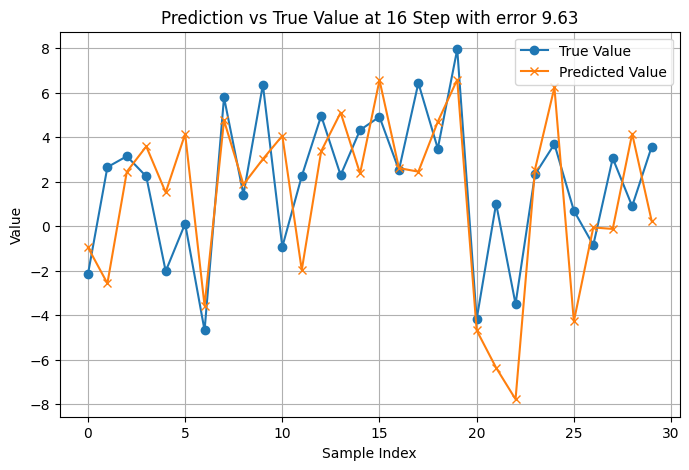

12.625046736456074


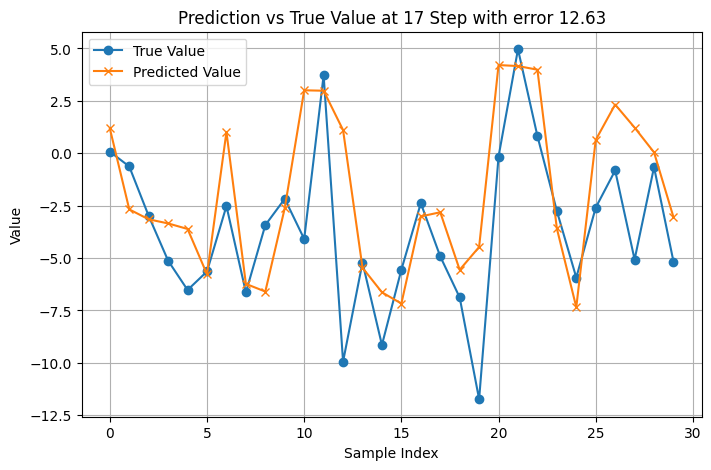

24.70793844701332


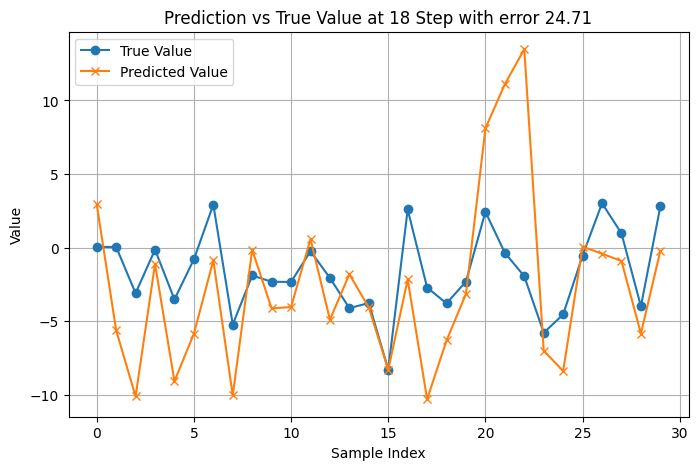

12.444309153106007


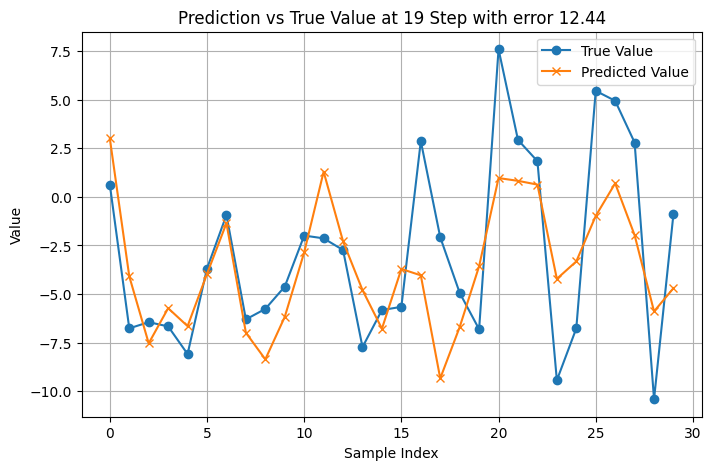

14.132192011644577


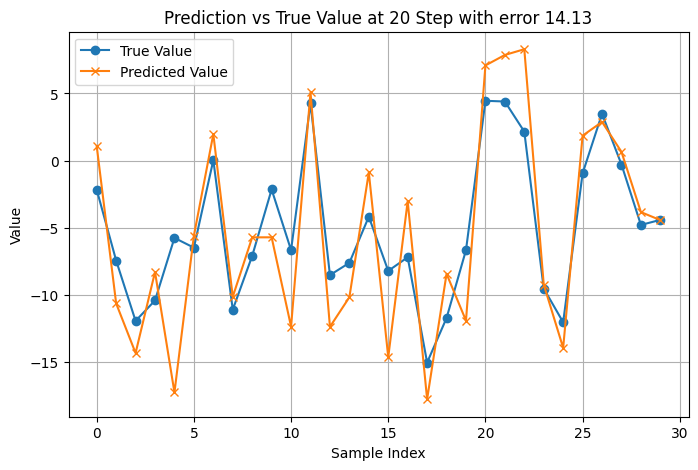

11.354103933033567


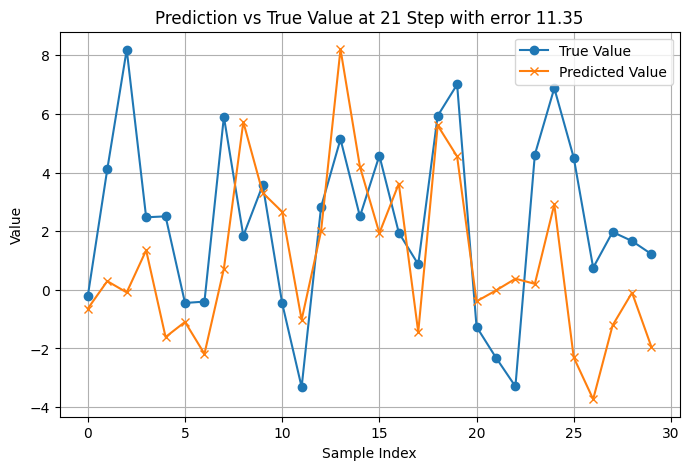

7.69776666864709


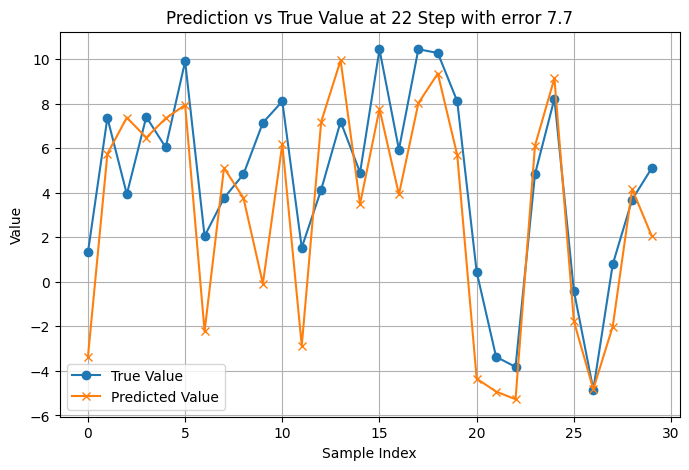

22.308032087423264


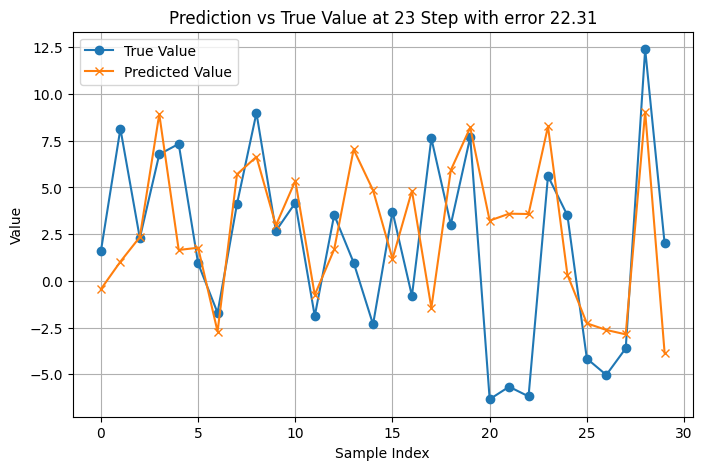

13.941704290097555


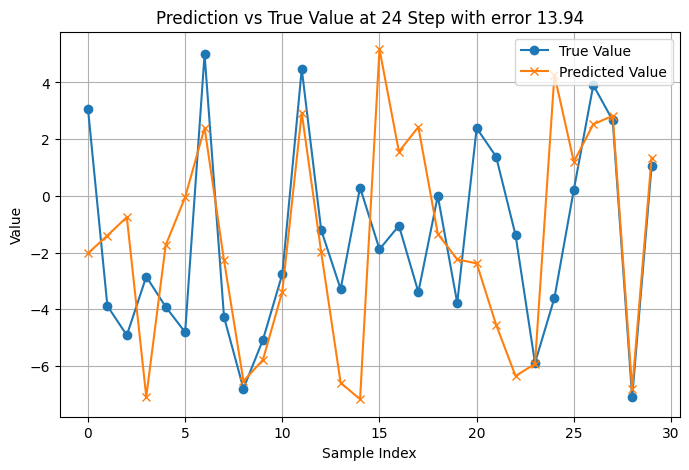

9.247811213410248


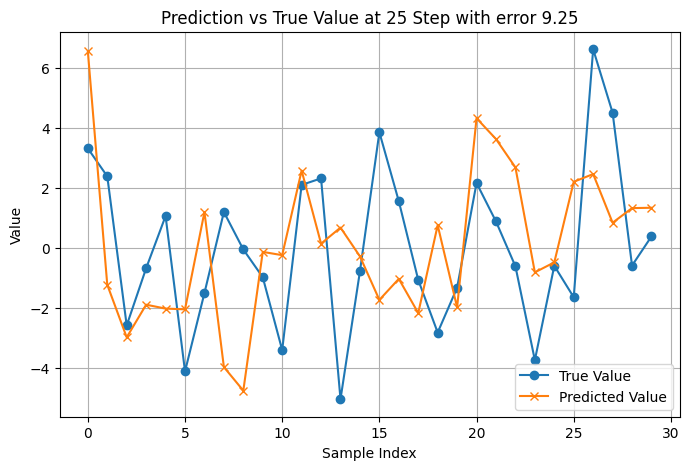

27.143048327327893


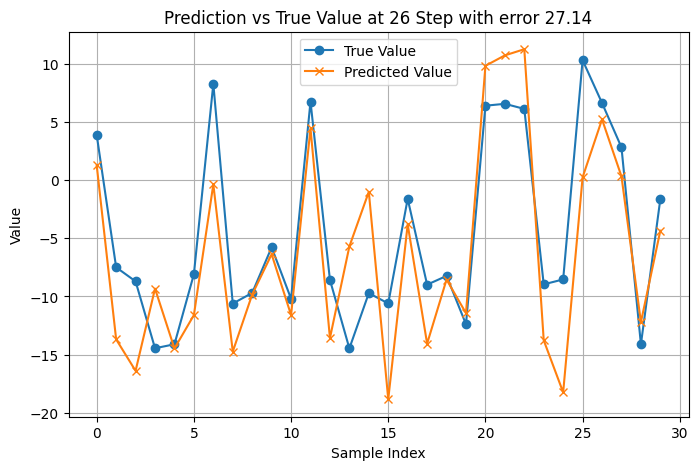

19.426390911355902


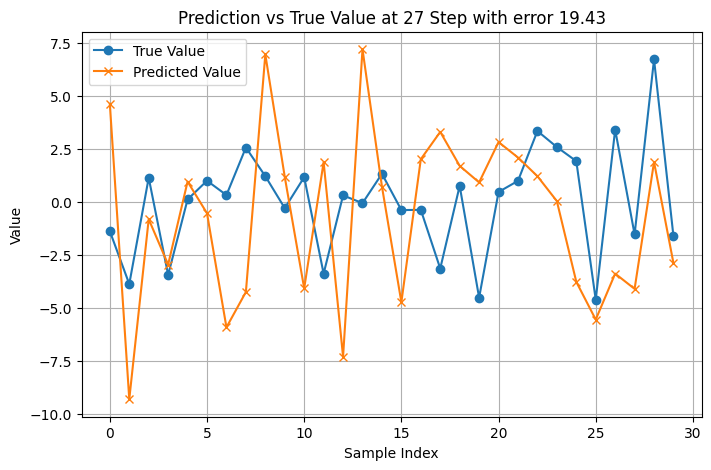

12.604382851169527


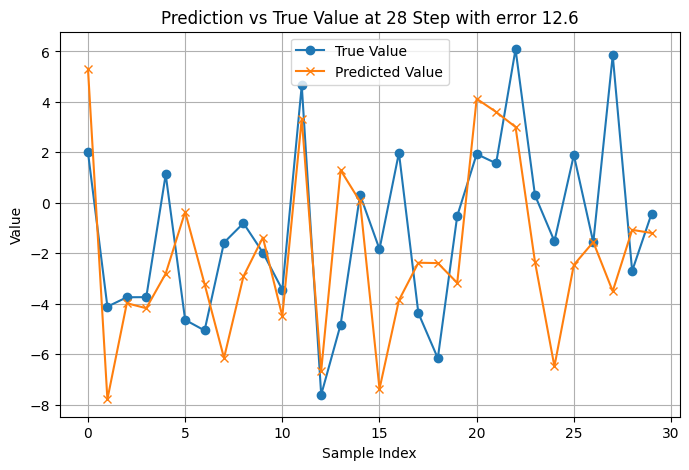

8.34773485073307


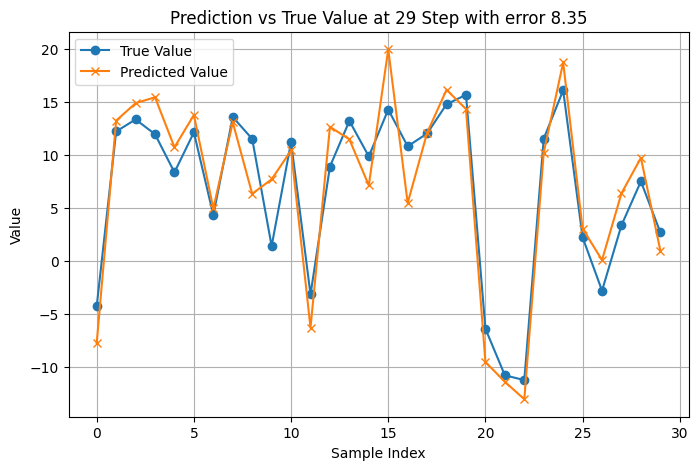

In [99]:
for i in range(test_data.shape[1]):
    y_pred = pred['pred.value'][:, i].detach().cpu()
    y_true = test_data[:, i].detach().cpu()

    tmp = F.mse_loss(y_pred, y_true)
    print(tmp.item())

    plt.figure(figsize=(8,5))
    plt.plot(y_true, label='True Value', marker='o')
    plt.plot(y_pred, label='Predicted Value', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Prediction vs True Value at {i} Step with error {round(tmp.item(), 2)}')
    plt.legend()
    plt.grid(True)
    plt.show()

0.9436292592314068


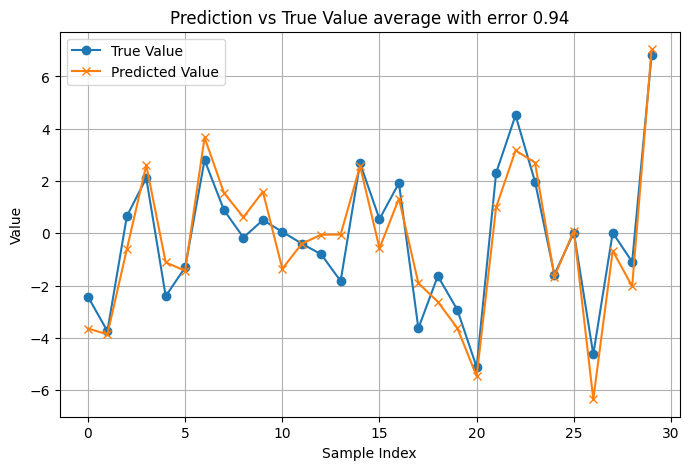

In [100]:
y_pred = pred['pred.value'].detach().cpu().mean(axis=0)
y_true = test_data.detach().cpu().mean(axis=0)

tmp = F.mse_loss(y_pred, y_true)
print(tmp.item())

plt.figure(figsize=(8,5))
plt.plot(y_true, label='True Value', marker='o')
plt.plot(y_pred, label='Predicted Value', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title(f'Prediction vs True Value average with error {round(tmp.item(), 2)}')
plt.legend()
plt.grid(True)
plt.show()

### Check gradient tracking

In [101]:
from torchviz import make_dot
SAVE_DIR = "gradient tracking/with unknown locations"
os.makedirs(SAVE_DIR, exist_ok=True)

for k, v in model.obj.items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        # file_path = os.path.join(SAVE_DIR, k)
        # dot = make_dot(v)
        # dot.attr(dpi='300')
        # dot.render(file_path, format='png')

for k, v in model.obj['G'].items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        # file_path = os.path.join(SAVE_DIR, k)
        # dot = make_dot(v)
        # dot.attr(dpi='300')
        # dot.render(file_path, format='png')

for k, v in pred.items():
    if isinstance(v, torch.Tensor):
        print(f"{k}: requires_grad={v.requires_grad};  grad_fn={v.grad_fn}; is_leaf={v.is_leaf}")
        # file_path = os.path.join(SAVE_DIR, k)
        # dot = make_dot(v)
        # dot.attr(dpi='300')
        # dot.render(file_path, format='png')

M: requires_grad=True;  grad_fn=<MmBackward0 object at 0x0000022ADD24BEE0>; is_leaf=False
s: requires_grad=True;  grad_fn=<SubBackward0 object at 0x0000022ADD287B80>; is_leaf=False
negloglik: requires_grad=True;  grad_fn=<AddBackward0 object at 0x0000022ADD287B80>; is_leaf=False
w: requires_grad=True;  grad_fn=<CopySlices object at 0x0000022ADD287B80>; is_leaf=False
V: requires_grad=True;  grad_fn=<SubBackward0 object at 0x0000022ADD287B80>; is_leaf=False
MRTS: requires_grad=False;  grad_fn=None; is_leaf=True
UZ: requires_grad=False;  grad_fn=None; is_leaf=True
Xu: requires_grad=False;  grad_fn=None; is_leaf=True
nconst: requires_grad=False;  grad_fn=None; is_leaf=True
BBBH: requires_grad=False;  grad_fn=None; is_leaf=True
pred.value: requires_grad=True;  grad_fn=<AddBackward0 object at 0x0000022ADD287B80>; is_leaf=False


## Test on missing data (EM)

### Fit and predict

In [102]:
# training on data with missing values
model = AutoFRK(
    logger_level=20
)
model.forward(
    data=data_missing,
    loc=locs,
    method='EM',
    requires_grad=True,
    maxit=18
)

# predict on data with missing values
pred = model.predict(
    obj = model.obj
)
pred

2025-11-15 15:17:30 - autoFRK.utils.logger - WARNING: Parameter "device" was not set. Value "cpu" detected and used.
2025-11-15 15:17:30 - autoFRK.utils.logger - INFO: Calculate TPS with rectangular.
2025-11-15 15:17:30 - autoFRK.utils.logger - INFO: Gradient tracking has been enabled for autoFRK.
2025-11-15 15:17:41 - autoFRK.utils.logger - INFO: Number of iteration: 18


{'pred.value': tensor([[-4.1116e-04, -3.9497e+00,  4.0036e+00,  ..., -1.4526e+00,
          -3.7522e-01,  4.1145e+00],
         [-2.9209e-01, -3.0439e+00,  2.9016e+00,  ..., -9.5498e-01,
           2.6059e-01,  2.9861e+00],
         [-6.3041e+00, -8.5653e+00,  7.0040e-01,  ...,  3.5754e-01,
          -2.5926e+00,  1.3498e+01],
         ...,
         [ 1.6149e+00, -1.1902e+00,  3.4782e+00,  ..., -1.4640e+00,
           6.4206e-01, -2.6463e-01],
         [-7.2337e+00, -4.5718e+00, -5.4361e+00,  ...,  1.9453e+00,
          -3.4074e+00,  9.6045e+00],
         [-8.9567e-01, -7.6086e-01, -1.4899e-02,  ...,  2.4364e-01,
           5.3257e-01,  8.8948e-01]], dtype=torch.float64,
        grad_fn=<AddBackward0>),
 'se': None}

### Compute MSE

In [103]:
F.mse_loss(pred['pred.value'].cpu(), data.cpu()).item()

5.115478056301716

In [104]:

# Initialize dictionary to store MSE for each time step
mse_per_time_step = {}

# Each time step MSE
for i in range(data.shape[1]):
    y_pred = pred['pred.value'][:, i].cpu()
    y_true = data[:, i].cpu()

    tmp = F.mse_loss(y_pred, y_true)
    # Store the MSE for each time step
    mse_per_time_step[i] = tmp.item()
    print(f"Time step {i} MSE: {tmp.item()}")

Time step 0 MSE: 4.875967203594552
Time step 1 MSE: 4.369584349036711
Time step 2 MSE: 4.602064467386915
Time step 3 MSE: 6.5872120168384125
Time step 4 MSE: 5.064193361944237
Time step 5 MSE: 5.202696398201089
Time step 6 MSE: 5.372447931715406
Time step 7 MSE: 5.2243068421137515
Time step 8 MSE: 5.398186424426877
Time step 9 MSE: 4.887776920247216
Time step 10 MSE: 5.384265186822336
Time step 11 MSE: 4.882248496752848
Time step 12 MSE: 3.4528625596290423
Time step 13 MSE: 5.230944830000359
Time step 14 MSE: 5.776517562782503
Time step 15 MSE: 5.16888984854407
Time step 16 MSE: 5.576656501168759
Time step 17 MSE: 5.837047313662281
Time step 18 MSE: 5.14308937518017
Time step 19 MSE: 5.827868902938376
Time step 20 MSE: 5.9158847418521034
Time step 21 MSE: 4.021221582439056
Time step 22 MSE: 4.681787635336462
Time step 23 MSE: 5.727585667930648
Time step 24 MSE: 3.408650149338019
Time step 25 MSE: 4.571523129680823
Time step 26 MSE: 4.726506675527951
Time step 27 MSE: 5.616377595464282


### Compare with R result

經過確認，R 與 Python 的結果差異甚遠。Josh表示R版本的EM實作與Python版本在某些細節上有所不同，導致最終結果的差異。

In [105]:
# Load external MSE data for comparison
datasets_path = f'../test datasets/mseForCompare'
mse_each_time_em = pd.read_csv(os.path.join(datasets_path, 'mse_each_time_em.csv'))

# Compare MSE values
a = mse_each_time_em.values
b = np.array(list(mse_per_time_step.values())).reshape(-1, 1)
temp = a - b

# Print differences
for i in range(temp.shape[0]):
    print(f"Time step {i} MSE difference: {temp[i][0]}")

Time step 0 MSE difference: 11.627903550855049
Time step 1 MSE difference: 9.708546228794187
Time step 2 MSE difference: -2.8974445602001953
Time step 3 MSE difference: -5.74154460887541
Time step 4 MSE difference: -1.4879059683286666
Time step 5 MSE difference: -1.2406873784298096
Time step 6 MSE difference: -0.692789027479626
Time step 7 MSE difference: 0.5054305419969589
Time step 8 MSE difference: 2.1961225640478332
Time step 9 MSE difference: -3.300698972956786
Time step 10 MSE difference: -4.646419929931122
Time step 11 MSE difference: -1.7704553606319684
Time step 12 MSE difference: -2.857457144160567
Time step 13 MSE difference: -0.687673177269069
Time step 14 MSE difference: -3.7599715577398034
Time step 15 MSE difference: 2.59172751793359
Time step 16 MSE difference: -3.0225360390992586
Time step 17 MSE difference: 6.311535310973819
Time step 18 MSE difference: -1.6501523718728204
Time step 19 MSE difference: 0.3244265411078935
Time step 20 MSE difference: 76.00320753240248
T